In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier, \
    StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
sns.set()

Clasificación binaria:

Predecir si un pasajero sobrevive o no.

Features:


* Survived: is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. It's important to note, more predictor variables do not make a better model, but the right variables.

* PassengerID and Ticket: variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.

* Pclass: is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.

* Name: variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.

* The Sex and Embarked: variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.

* The Age and Fare: variable are continuous quantitative datatypes.

* The SibSp: represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.

* The Cabin: variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels


In [15]:
df = pd.read_csv('../data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Outliers

TODO

# Valores faltantes

## Detección

In [16]:
df.shape

(891, 12)

In [17]:
df_null = df.isnull().sum()
df_null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df['Cabin'].isnull().sum()

687

In [19]:
pd.DataFrame(df_null, columns=['total_nulls']).sort_values('total_nulls', ascending=False)

,total_nulls
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


In [20]:
def calc_missing(df):
    # obtener columnas con valores faltantes
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]

    # calcular % de nulos por cada columna
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        null_per = (null_count / df.shape[0]) * 100
        print("{}: {}, {:.2f} %".format(col, null_count, null_per))

In [21]:
df = df.fillna(np.nan)

In [22]:
calc_missing(df)

Age: 177, 19.87 %
Cabin: 687, 77.10 %
Embarked: 2, 0.22 %


In [23]:
# ! pip install missingno

<AxesSubplot:>

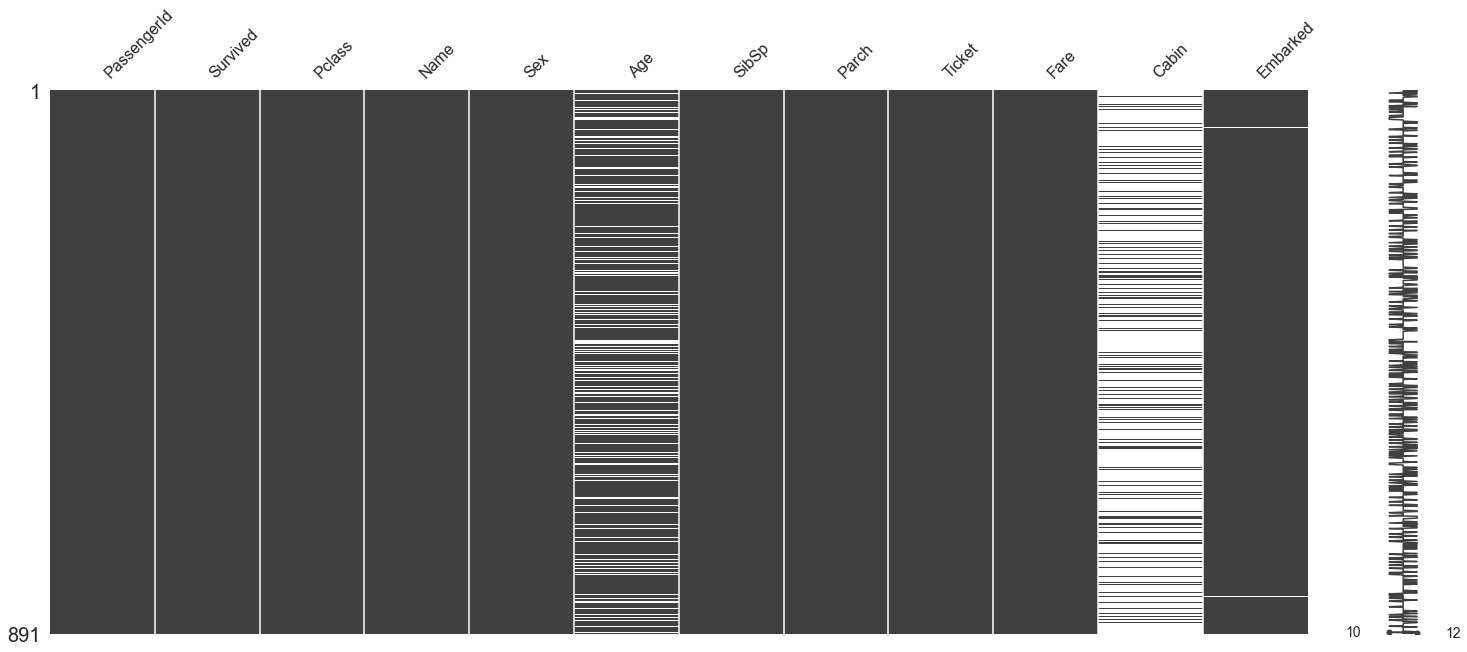

In [24]:
import missingno

missingno.matrix(df)

In [25]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Corrección

In [27]:
# no es factible borrar todos los registros donde haya nulos
df.dropna().shape

(183, 12)

### Embarked

In [28]:
# tipo categórico
# detectar el valor más frecuente en la columna Embarked
mode = df['Embarked'].dropna().mode()[0]
mode

'S'

In [29]:
# corregir nulos con el valor más frecuente
df['Embarked'].fillna(mode, inplace=True)

### Cabin

In [30]:
# Borrar la columna entera
# df = df.drop(columns=['Cabin'], axis=1)
# df.drop(columns=['Cabin'], axis=1, inplace=True)

### Age

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


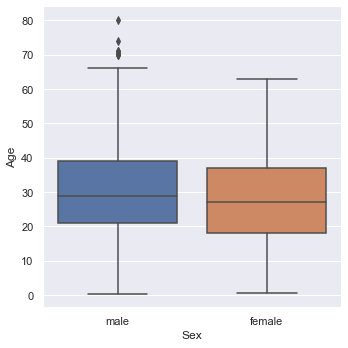

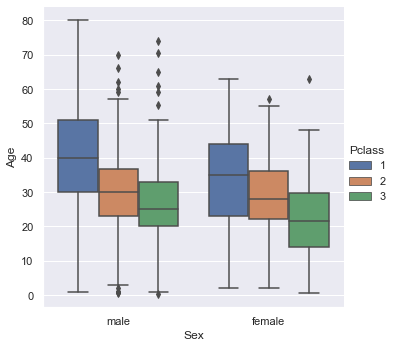

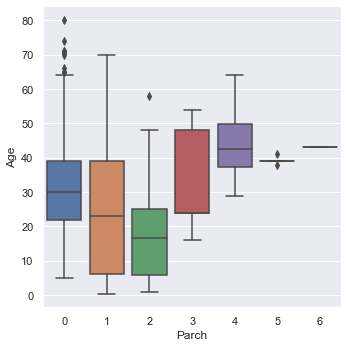

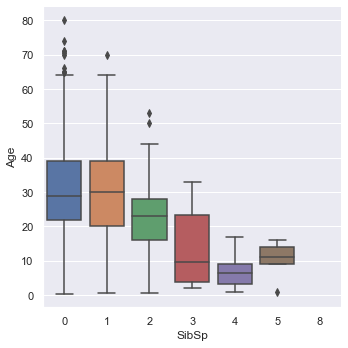

In [32]:
# df['Age'].fillna(df['Age'].median(), inplace=True)
sns.catplot(data=df, x='Sex', y='Age', kind='box')
sns.catplot(data=df, x='Sex', y='Age', hue='Pclass', kind='box')
sns.catplot(data=df, x='Parch', y='Age', kind='box')
sns.catplot(data=df, x='SibSp', y='Age', kind='box')

In [33]:
df['Sex'] = df['Sex'].map({
    'male': 0,
    'female': 1
})

<AxesSubplot:>

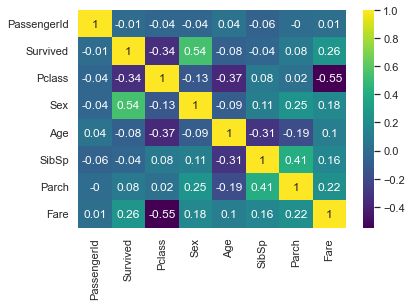

In [34]:
sns.heatmap(df.corr().round(2), cmap='viridis', annot=True)

In [35]:
df["Age"].median()

28.0

In [36]:
filter = df["Age"].isnull()
index_nan_ages = df["Age"][filter].index
index_nan_ages

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [37]:
"""
Rellenar Age con la mediana de filas similares según las features más correlacionadas: Pclass, Parch, SibSp
"""
for i in index_nan_ages:
    age_med = df["Age"].median()
    age_pred = df["Age"][(
            (df['SibSp'] == df.iloc[i]["SibSp"]) & (df['Parch'] == df.iloc[i]["Parch"]) & (
            df['Pclass'] == df.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred):
        df['Age'].iloc[i] = age_pred
        print(age_pred)
    else:
        df['Age'].iloc[i] = age_med

C:\Users\alanj\AppData\Local\Temp\ipykernel_30332\1067123214.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].iloc[i] = age_pred


26.0
31.0
26.0
26.0
26.0
26.0
36.0
26.0
26.0
26.0
26.0
25.0
26.0
26.0
38.5
38.5
19.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
26.0
26.0
19.0
24.0
26.0
26.0


C:\Users\alanj\AppData\Local\Temp\ipykernel_30332\1067123214.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].iloc[i] = age_med


37.5
38.5
3.0
28.0
31.0
38.5
25.0
26.0
26.0
28.0
25.0
26.0
3.0
26.0
25.0
25.0
26.0
38.5
26.0
26.0
38.5
26.0
31.0
38.5
38.5
38.5
26.0
26.0
31.0
26.0
38.5
28.0
26.0
36.0
26.0
25.0
38.5
26.0
26.0
26.0
25.0
26.0
26.0
36.0
26.0
26.0
3.0
26.0
26.0
31.0
26.0
26.0
26.0
26.0
25.0
26.0
25.0
26.0
36.0
26.0
26.0
31.0
26.0
26.0
38.5
31.0
3.0
25.0
26.0
26.0
26.0
38.5
26.0
26.0
26.0
26.0
38.5
26.0
24.0
26.0
31.0
26.0
38.5
26.0
26.0
26.0
26.0
26.0
25.0
26.0
26.0
24.0
31.0
26.0
26.0
38.5
26.0
25.0
26.0
26.0
38.5
25.0
26.0
26.0
26.0
26.0
26.0
26.0
36.0
31.0
26.0
26.0
26.0
19.0
38.5
26.0
26.0
31.0
26.0
26.0
38.5
26.0
38.5
25.0
26.0
26.0
26.0
13.5
26.0
28.0
38.5
38.5
26.0
26.0
26.0
26.0
26.0
38.5
28.0
36.0
26.0
28.0
26.0
26.0
13.5


In [38]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Modelado base

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [40]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
y = df['Survived']

In [41]:
def calc_predictions(X, y):

    df_results = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall_sensitivity', 'recall_specificity', 'f1', 'auc'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    models = [
        LogisticRegression(max_iter=10000),
        KNeighborsClassifier(n_neighbors=11),
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=50),
        AdaBoostClassifier(n_estimators=100),
        GradientBoostingClassifier(n_estimators=100)
    ]

    for model in models:
        # entrenamiento y predicciones
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # classification metrics
        model_name = model.__class__.__name__
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall_sensitivity = recall_score(y_test, y_pred)
        recall_specificity = recall_score(y_test, y_pred, pos_label=0)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)

        # guardar resultados
        row = [model_name, accuracy, precision, recall_sensitivity, recall_specificity, f1, auc]
        df_results.loc[len(df_results)] = row

    return df_results

In [42]:
calc_predictions(X, y)

,model_name,accuracy,precision,recall_sensitivity,recall_specificity,f1,auc
0,LogisticRegression,0.811659,0.783133,0.730337,0.865672,0.755814,0.798004
1,KNeighborsClassifier,0.690583,0.635135,0.528090,0.798507,0.576687,0.663299
2,SVC,0.659193,0.709677,0.247191,0.932836,0.366667,0.590013
3,DecisionTreeClassifier,0.762332,0.714286,0.674157,0.820896,0.693642,0.747526
4,RandomForestClassifier,0.802691,0.758621,0.741573,0.843284,0.750000,0.792428
5,AdaBoostClassifier,0.784753,0.730337,0.730337,0.820896,0.730337,0.775616
6,GradientBoostingClassifier,0.834081,0.851351,0.707865,0.917910,0.773006,0.812888


# EDAs

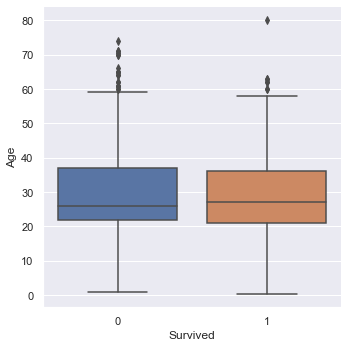

In [43]:
sns.catplot(data=df, x='Survived', y='Age', kind='box')

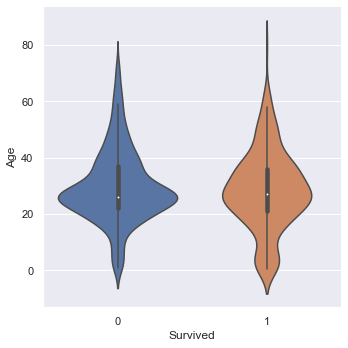

In [44]:
sns.catplot(data=df, x='Survived', y='Age', kind='violin')

<AxesSubplot:>

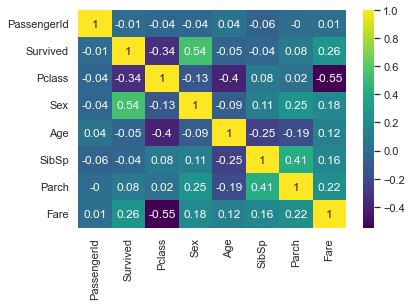

In [45]:
sns.heatmap(df.corr().round(2), cmap='viridis', annot=True)

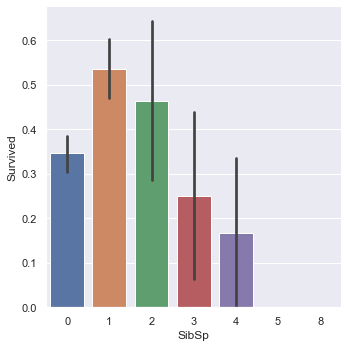

In [46]:
sns.catplot(data=df, x='SibSp', y='Survived', kind='bar')

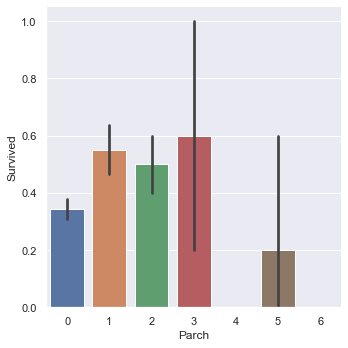

In [47]:
sns.catplot(data=df, x='Parch', y='Survived', kind='bar')

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

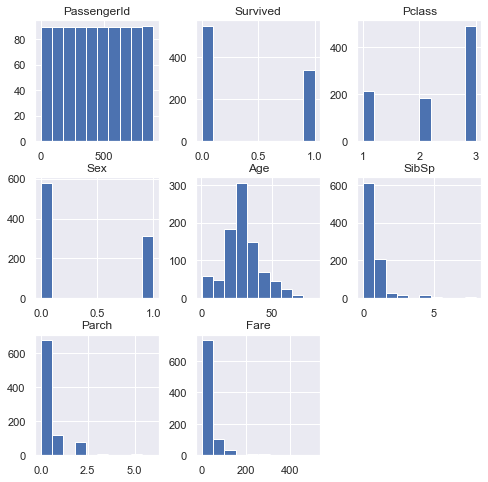

In [48]:
df.hist(figsize=(8,8))

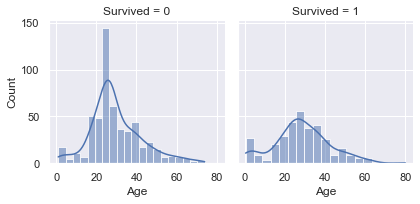

In [49]:
grid = sns.FacetGrid(df, col='Survived')
grid.map(sns.histplot, "Age", kde=True)

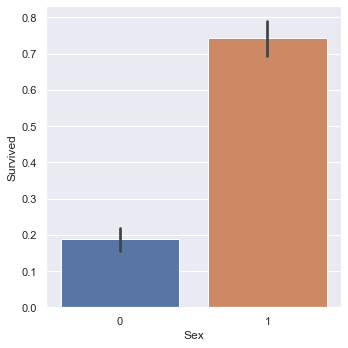

In [50]:
sns.catplot(data=df, x='Sex', y='Survived', kind='bar')

In [51]:
df[["Sex", "Survived"]].groupby('Sex').mean()

,Survived
Sex,
0,0.188908
1,0.742038


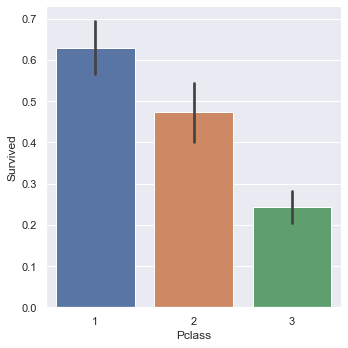

In [52]:
sns.catplot(data=df, x='Pclass', y='Survived', kind='bar')

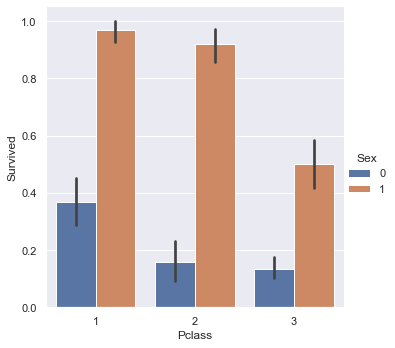

In [53]:
sns.catplot(data=df, x='Pclass', y='Survived', hue='Sex', kind='bar')

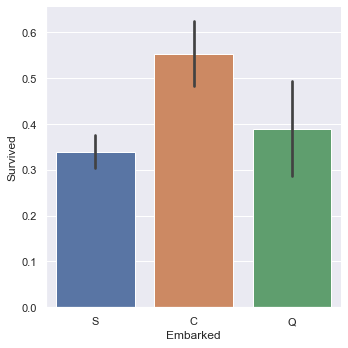

In [54]:
sns.catplot(data=df, x='Embarked', y='Survived', kind='bar')

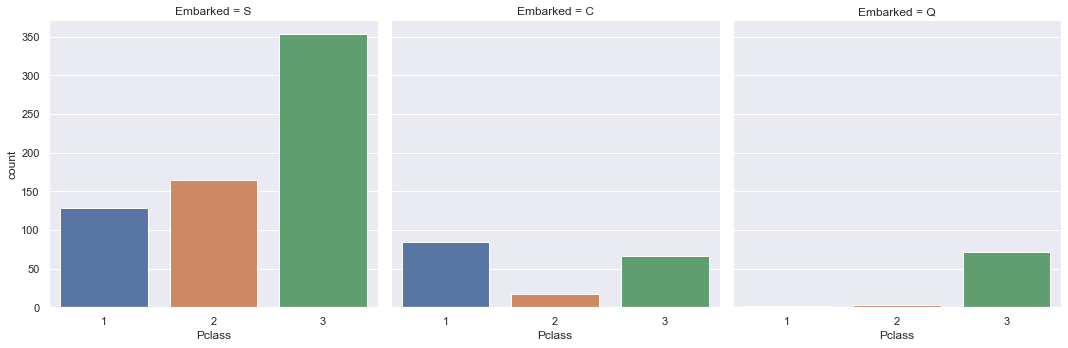

In [55]:
sns.catplot(data=df, col='Embarked', x='Pclass', kind='count')

# Borrar features

In [56]:
df.drop('PassengerId', axis=1, inplace=True)

In [57]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


# Binarización

Importante: cuidado con el orden de los pasos, si se discretiza primero eso puede afectar a la binarización.

In [58]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=17)
df['adult'] = binarizer.fit_transform(pd.DataFrame(df["Age"]))
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,adult
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1.0


In [59]:
# pasamos de decimal a entero
df['adult'] = df['adult'].astype(int)

<AxesSubplot:xlabel='adult', ylabel='count'>

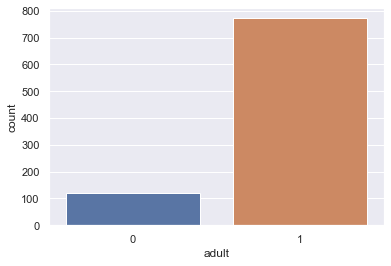

In [60]:
sns.countplot(data=df, x='adult')

<AxesSubplot:>

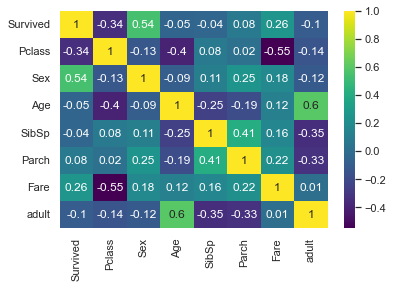

In [61]:
sns.heatmap(df.corr().round(2), cmap='viridis', annot=True)

# Discretización

## Age

In [62]:
df["AgeBin"] = pd.cut(df['Age'], 5)

In [63]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,adult,AgeBin
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]"


In [64]:
df[['AgeBin', 'Survived']].groupby('AgeBin').mean()

,Survived
AgeBin,
"(0.34, 16.336]",0.518868
"(16.336, 32.252]",0.340862
"(32.252, 48.168]",0.412844
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


In [65]:
df.loc[df["Age"] <= 16, "Age"] = 0
df.loc[(df["Age"] > 16) & (df["Age"] <= 32), "Age"] = 1
df.loc[(df["Age"] > 32) & (df["Age"] <= 48), "Age"] = 2
df.loc[(df["Age"] > 48) & (df["Age"] <= 64), "Age"] = 3
df.loc[(df["Age"] > 64), "Age"] = 4

In [66]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,adult,AgeBin
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,1,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,1,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]"


<AxesSubplot:>

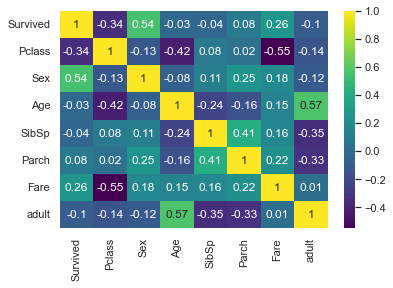

In [67]:
sns.heatmap(df.corr().round(2), cmap='viridis', annot=True)

# Creación de features

In [68]:
df.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,adult,AgeBin
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,1,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,1,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]"
5,0,3,"Moran, Mr. James",0,1.0,0,0,330877,8.4583,NaN,Q,1,"(16.336, 32.252]"
6,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,S,1,"(48.168, 64.084]"
7,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,S,0,"(0.34, 16.336]"
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,0,2,347742,11.1333,NaN,S,1,"(16.336, 32.252]"
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,30.0708,NaN,C,0,"(0.34, 16.336]"


## FamilySize

In [69]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [70]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,adult,AgeBin,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]",2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,1,"(32.252, 48.168]",2
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(16.336, 32.252]",1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,1,"(32.252, 48.168]",2
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]",1


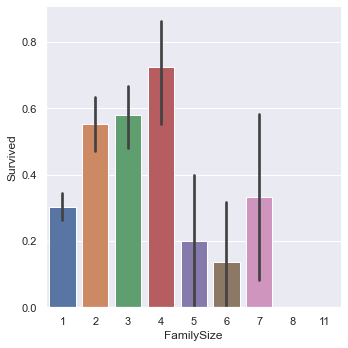

In [71]:
sns.catplot(data=df, x='FamilySize', y='Survived', kind='bar')

In [72]:
df['Single'] = df['FamilySize'].map(lambda size: 1 if size == 1 else 0)
df['SmallFamily'] = df['FamilySize'].map(lambda size: 1 if 2 <= size <= 3 else 0)
df['MedFamily'] = df['FamilySize'].map(lambda size: 1 if size == 4 else 0)
df['LargeFamily'] = df['FamilySize'].map(lambda size: 1 if size >= 5 else 0)

In [73]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,adult,AgeBin,FamilySize,Single,SmallFamily,MedFamily,LargeFamily
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]",2,0,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,1,"(32.252, 48.168]",2,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(16.336, 32.252]",1,1,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,1,"(32.252, 48.168]",2,0,1,0,0
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]",1,1,0,0,0


<AxesSubplot:>

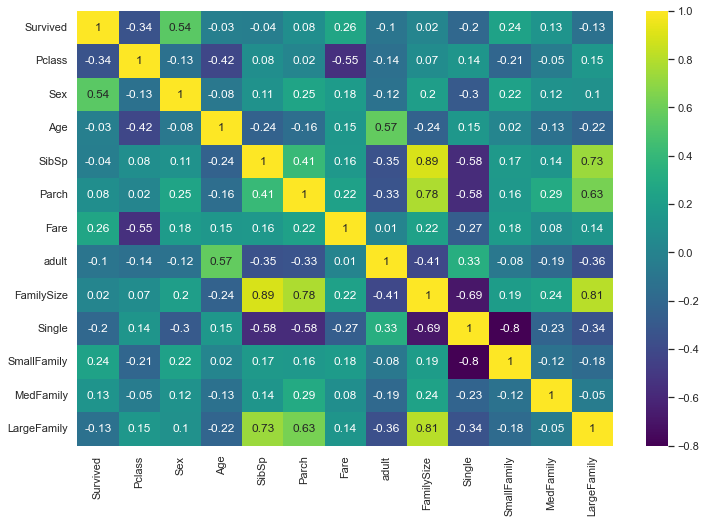

In [74]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(2), cmap='viridis', annot=True)

## IsAlone

In [75]:
df['IsAlone'] = 1

In [76]:
filter = df['FamilySize'] > 1
df.loc[filter]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,adult,AgeBin,FamilySize,Single,SmallFamily,MedFamily,LargeFamily,IsAlone
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]",2,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,1,"(32.252, 48.168]",2,0,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,1,"(32.252, 48.168]",2,0,1,0,0,1
7,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,S,0,"(0.34, 16.336]",5,0,0,0,1,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,0,2,347742,11.1333,NaN,S,1,"(16.336, 32.252]",3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",1,1.0,1,0,P/PP 3381,24.0000,NaN,C,1,"(16.336, 32.252]",2,0,1,0,0,1
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,3.0,0,1,11767,83.1583,C50,C,1,"(48.168, 64.084]",2,0,1,0,0,1
880,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",1,1.0,0,1,230433,26.0000,NaN,S,1,"(16.336, 32.252]",2,0,1,0,0,1
885,0,3,"Rice, Mrs. William (Margaret Norton)",1,2.0,0,5,382652,29.1250,NaN,Q,1,"(32.252, 48.168]",6,0,0,0,1,1


In [77]:
df['IsAlone'].loc[filter] = 0

C:\Users\alanj\AppData\Local\Temp\ipykernel_30332\1023575383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsAlone'].loc[filter] = 0


In [78]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,adult,AgeBin,FamilySize,Single,SmallFamily,MedFamily,LargeFamily,IsAlone
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]",2,0,1,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,1,"(32.252, 48.168]",2,0,1,0,0,0
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(16.336, 32.252]",1,1,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,1,"(32.252, 48.168]",2,0,1,0,0,0
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]",1,1,0,0,0,1


## Title

In [79]:
df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [80]:
title = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]
title

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Don',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 

In [81]:
df["Title"] = pd.Series(title)

In [82]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,adult,AgeBin,FamilySize,Single,SmallFamily,MedFamily,LargeFamily,IsAlone,Title
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]",2,0,1,0,0,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,1,"(32.252, 48.168]",2,0,1,0,0,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(16.336, 32.252]",1,1,0,0,0,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,1,"(32.252, 48.168]",2,0,1,0,0,0,Mrs
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]",1,1,0,0,0,1,Mr
5,0,3,"Moran, Mr. James",0,1.0,0,0,330877,8.4583,NaN,Q,1,"(16.336, 32.252]",1,1,0,0,0,1,Mr
6,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,S,1,"(48.168, 64.084]",1,1,0,0,0,1,Mr
7,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,S,0,"(0.34, 16.336]",5,0,0,0,1,0,Master
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,0,2,347742,11.1333,NaN,S,1,"(16.336, 32.252]",3,0,1,0,0,0,Mrs
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,30.0708,NaN,C,0,"(0.34, 16.336]",2,0,1,0,0,0,Mrs


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Don'),
  Text(5, 0, 'Rev'),
  Text(6, 0, 'Dr'),
  Text(7, 0, 'Mme'),
  Text(8, 0, 'Ms'),
  Text(9, 0, 'Major'),
  Text(10, 0, 'Lady'),
  Text(11, 0, 'Sir'),
  Text(12, 0, 'Mlle'),
  Text(13, 0, 'Col'),
  Text(14, 0, 'Capt'),
  Text(15, 0, 'the Countess'),
  Text(16, 0, 'Jonkheer')])

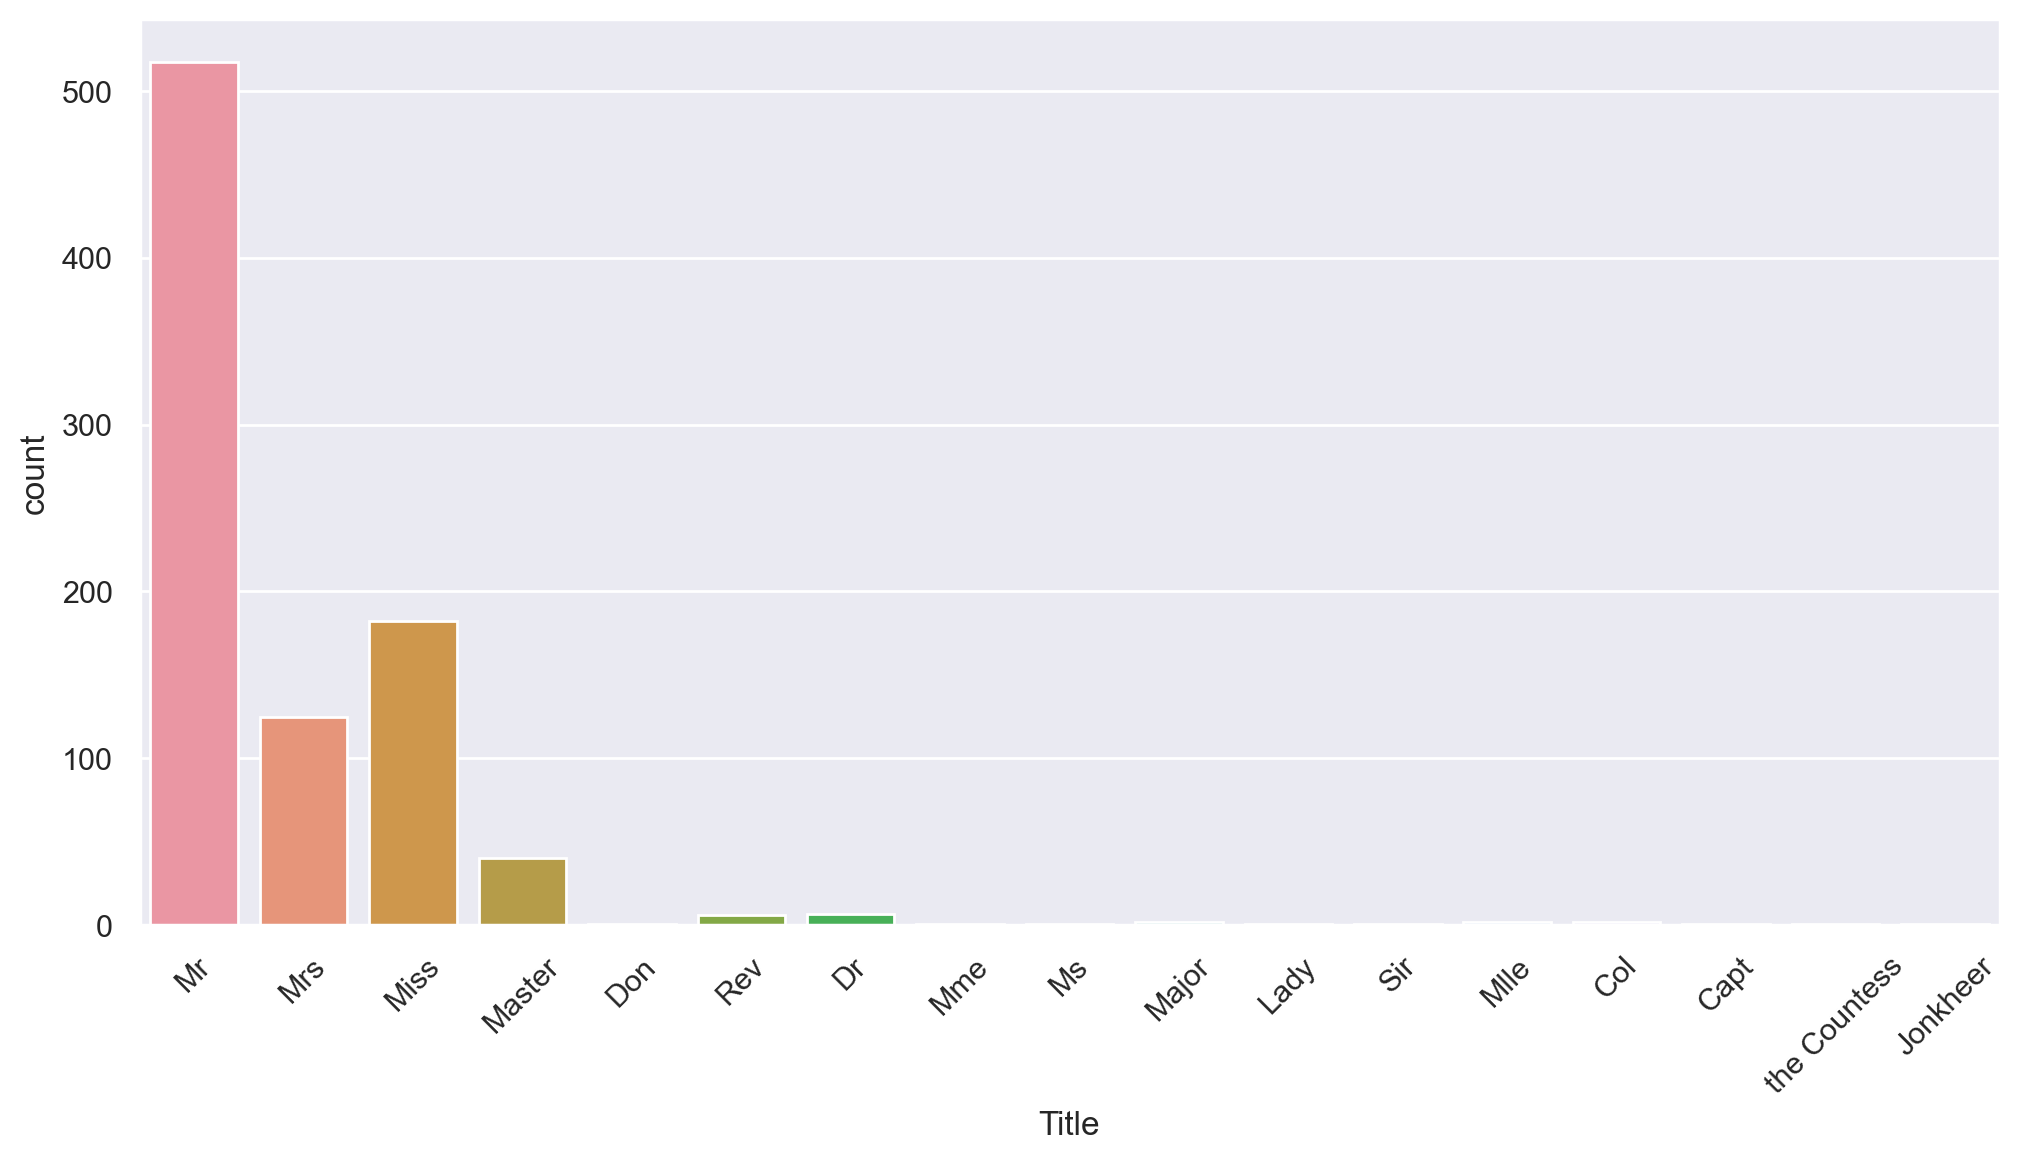

In [83]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='Title')
plt.xticks(rotation=45)

In [84]:
print(df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [85]:
df['Title'] = df['Title'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer'], 'Other')

In [86]:
print(df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Other']


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Other')])

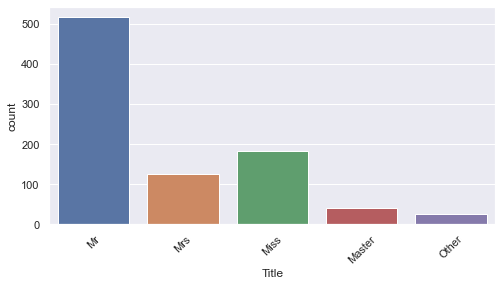

In [87]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Title')
plt.xticks(rotation=45)

In [88]:
df['Title'] = df['Title'].map({
    'Mr': 0,
    'Mrs': 1,
    'Miss': 1,
    'Master': 2,
    'Other': 3
})

In [89]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,adult,AgeBin,FamilySize,Single,SmallFamily,MedFamily,LargeFamily,IsAlone,Title
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]",2,0,1,0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,1,"(32.252, 48.168]",2,0,1,0,0,0,1
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(16.336, 32.252]",1,1,0,0,0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,1,"(32.252, 48.168]",2,0,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]",1,1,0,0,0,1,0


<AxesSubplot:>

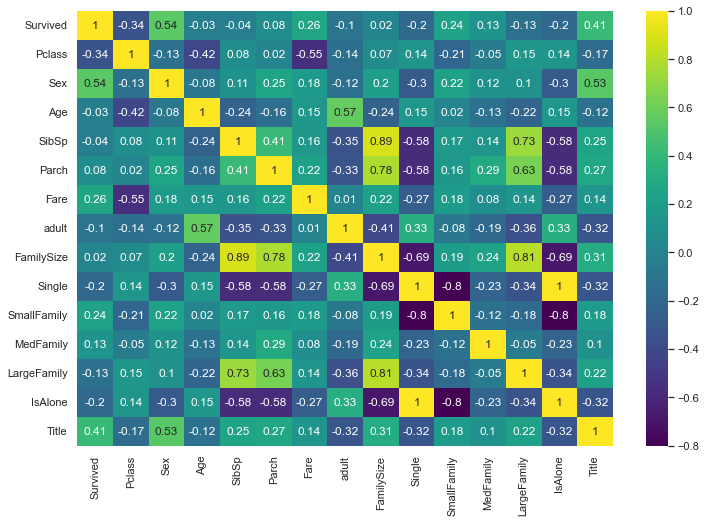

In [90]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(2), cmap='viridis', annot=True)

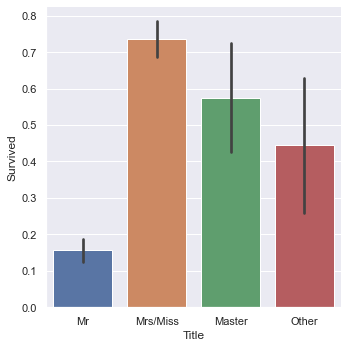

In [91]:
graph = sns.catplot(data=df, x='Title', y='Survived', kind='bar')
graph.set_xticklabels(["Mr", "Mrs/Miss", "Master", "Other"])

# Escalar

TODO

# Transformar distribuciones

TODO

# Codificación (Categóricos a numéricos)

In [92]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,adult,AgeBin,FamilySize,Single,SmallFamily,MedFamily,LargeFamily,IsAlone,Title
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]",2,0,1,0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,1,"(32.252, 48.168]",2,0,1,0,0,0,1
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(16.336, 32.252]",1,1,0,0,0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,1,"(32.252, 48.168]",2,0,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]",1,1,0,0,0,1,0


### Ticket

In [93]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [94]:
tickets = []
for ticket in list(df['Ticket']):
    if ticket.isdigit():
        tickets.append('X')
    else:
        prefix = ticket.replace(".", "").replace("/", "").strip().split(' ')[0]
        tickets.append(prefix)

df['Ticket'] = tickets

In [95]:
print(df['Ticket'].unique())

['A5' 'PC' 'STONO2' 'X' 'PP' 'CA' 'SCParis' 'SCA4' 'A4' 'SP' 'SOC' 'WC'
 'SOTONOQ' 'WEP' 'STONO' 'C' 'SCPARIS' 'SOP' 'Fa' 'LINE' 'FCC' 'SWPP'
 'SCOW' 'PPP' 'SC' 'SCAH' 'AS' 'SOPP' 'FC' 'SOTONO2' 'CASOTON']


In [96]:
from sklearn.preprocessing import OrdinalEncoder

# encoder = LabelEncoder() # Se utiliza para la variable de salida
encoder = OrdinalEncoder()

np_ticket_2d = np.array(df['Ticket']).reshape(-1,1)
df['Ticket'] = encoder.fit_transform(np_ticket_2d)

In [97]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,adult,FamilySize,Single,SmallFamily,MedFamily,LargeFamily,IsAlone,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,1.317621,0.523008,0.381594,25.303030,32.204208,0.866442,1.904602,0.602694,0.295174,0.032548,0.069585,0.602694,0.525253
std,0.486592,0.836071,0.477990,0.827283,1.102743,0.806057,9.110691,49.693429,0.340368,1.613459,0.489615,0.456377,0.177549,0.254589,0.489615,0.722186
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,28.000000,7.910400,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,30.000000,14.454200,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,30.000000,31.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,4.000000,8.000000,6.000000,30.000000,512.329200,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [98]:
df["TicketBin"] = pd.cut(df['Ticket'], 4)
df[['TicketBin', 'Survived']].groupby('TicketBin').mean()

,Survived
TicketBin,
"(-0.03, 7.5]",0.268293
"(7.5, 15.0]",0.613333
"(15.0, 22.5]",0.250000
"(22.5, 30.0]",0.377465


In [99]:
df.loc[df["Ticket"] <= 7.5, "Ticket"] = 0
df.loc[(df["Ticket"] > 7.5) & (df["Ticket"] <= 15), "Ticket"] = 1
df.loc[(df["Ticket"] > 15) & (df["Ticket"] <= 22.5), "Ticket"] = 2
df.loc[(df["Ticket"] > 22.5), "Ticket"] = 3

In [100]:
df['Ticket'] = df['Ticket'].astype(int)

In [101]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,adult,AgeBin,FamilySize,Single,SmallFamily,MedFamily,LargeFamily,IsAlone,Title,TicketBin
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,0,7.2500,NaN,...,1,"(16.336, 32.252]",2,0,1,0,0,0,0,"(-0.03, 7.5]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,1,71.2833,C85,...,1,"(32.252, 48.168]",2,0,1,0,0,0,1,"(7.5, 15.0]"
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,3,7.9250,NaN,...,1,"(16.336, 32.252]",1,1,0,0,0,1,1,"(22.5, 30.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,3,53.1000,C123,...,1,"(32.252, 48.168]",2,0,1,0,0,0,1,"(22.5, 30.0]"
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,3,8.0500,NaN,...,1,"(32.252, 48.168]",1,1,0,0,0,1,0,"(22.5, 30.0]"
5,0,3,"Moran, Mr. James",0,1.0,0,0,3,8.4583,NaN,...,1,"(16.336, 32.252]",1,1,0,0,0,1,0,"(22.5, 30.0]"
6,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,3,51.8625,E46,...,1,"(48.168, 64.084]",1,1,0,0,0,1,0,"(22.5, 30.0]"
7,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,3,21.0750,NaN,...,0,"(0.34, 16.336]",5,0,0,0,1,0,2,"(22.5, 30.0]"
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,0,2,3,11.1333,NaN,...,1,"(16.336, 32.252]",3,0,1,0,0,0,1,"(22.5, 30.0]"
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,3,30.0708,NaN,...,0,"(0.34, 16.336]",2,0,1,0,0,0,1,"(22.5, 30.0]"


<AxesSubplot:>

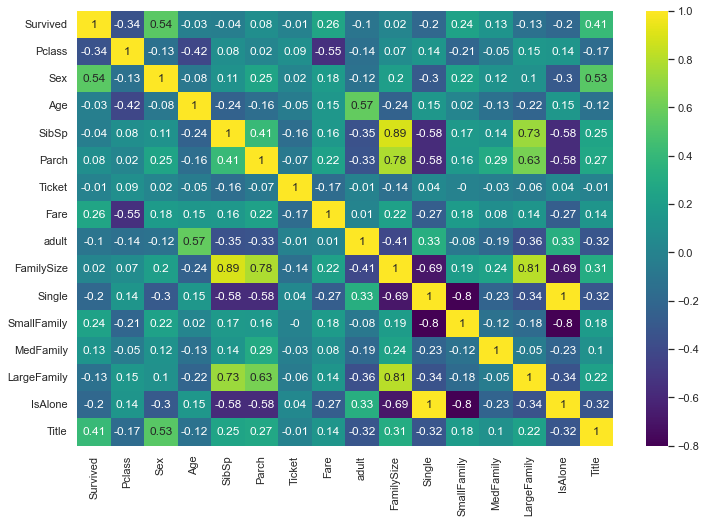

In [102]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(2), cmap='viridis', annot=True)

### pclass

In [103]:
# pd.get_dummies(df, columns=["Pclass"], prefix='pc')
df["Pclass"] = df["Pclass"].astype("category")
df = pd.get_dummies(df, columns=["Pclass"])

In [104]:
df.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Single,SmallFamily,MedFamily,LargeFamily,IsAlone,Title,TicketBin,Pclass_1,Pclass_2,Pclass_3
0,0,"Braund, Mr. Owen Harris",0,1.0,1,0,0,7.2500,NaN,S,...,0,1,0,0,0,0,"(-0.03, 7.5]",0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,1,71.2833,C85,C,...,0,1,0,0,0,1,"(7.5, 15.0]",1,0,0
2,1,"Heikkinen, Miss. Laina",1,1.0,0,0,3,7.9250,NaN,S,...,1,0,0,0,1,1,"(22.5, 30.0]",0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,3,53.1000,C123,S,...,0,1,0,0,0,1,"(22.5, 30.0]",1,0,0
4,0,"Allen, Mr. William Henry",0,2.0,0,0,3,8.0500,NaN,S,...,1,0,0,0,1,0,"(22.5, 30.0]",0,0,1


<AxesSubplot:>

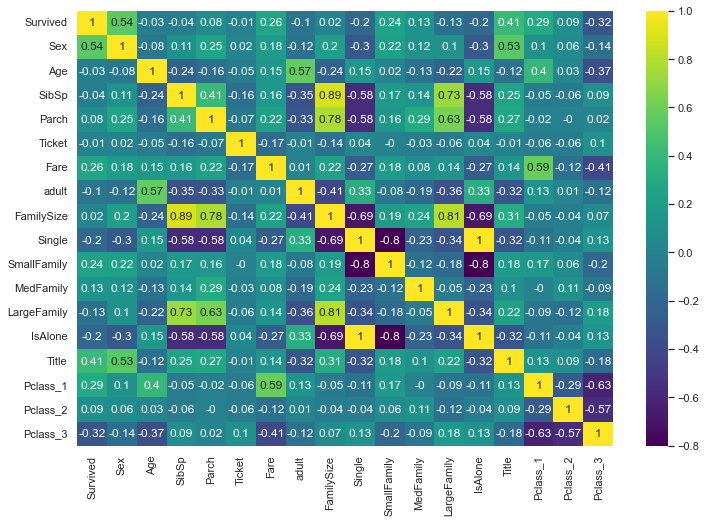

In [105]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(2), cmap='viridis', annot=True)

### Cabin

In [106]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [107]:
df["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [108]:
df["Cabin"].isnull().sum()

687

In [109]:
filter = df["Cabin"].notnull()
df["Cabin"][filter]

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [110]:
df['Cabin'] = pd.Series([cabin[0] if not pd.isnull(cabin) else 'X' for cabin in df['Cabin']])

In [111]:
df['Cabin'].unique()

array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [112]:
df.head(10)

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Single,SmallFamily,MedFamily,LargeFamily,IsAlone,Title,TicketBin,Pclass_1,Pclass_2,Pclass_3
0,0,"Braund, Mr. Owen Harris",0,1.0,1,0,0,7.2500,X,S,...,0,1,0,0,0,0,"(-0.03, 7.5]",0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,1,71.2833,C,C,...,0,1,0,0,0,1,"(7.5, 15.0]",1,0,0
2,1,"Heikkinen, Miss. Laina",1,1.0,0,0,3,7.9250,X,S,...,1,0,0,0,1,1,"(22.5, 30.0]",0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,3,53.1000,C,S,...,0,1,0,0,0,1,"(22.5, 30.0]",1,0,0
4,0,"Allen, Mr. William Henry",0,2.0,0,0,3,8.0500,X,S,...,1,0,0,0,1,0,"(22.5, 30.0]",0,0,1
5,0,"Moran, Mr. James",0,1.0,0,0,3,8.4583,X,Q,...,1,0,0,0,1,0,"(22.5, 30.0]",0,0,1
6,0,"McCarthy, Mr. Timothy J",0,3.0,0,0,3,51.8625,E,S,...,1,0,0,0,1,0,"(22.5, 30.0]",1,0,0
7,0,"Palsson, Master. Gosta Leonard",0,0.0,3,1,3,21.0750,X,S,...,0,0,0,1,0,2,"(22.5, 30.0]",0,0,1
8,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,0,2,3,11.1333,X,S,...,0,1,0,0,0,1,"(22.5, 30.0]",0,0,1
9,1,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,3,30.0708,X,C,...,0,1,0,0,0,1,"(22.5, 30.0]",0,1,0


In [113]:
df['Cabin'].value_counts()

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

<AxesSubplot:xlabel='Cabin', ylabel='count'>

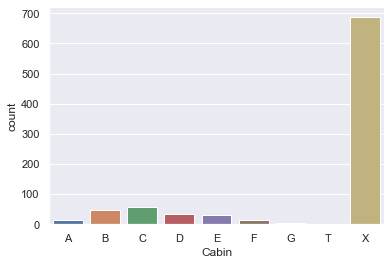

In [114]:
sns.countplot(data=df, x='Cabin', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'X'])

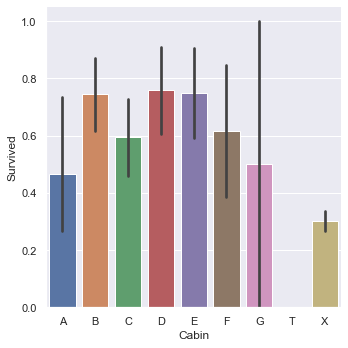

In [115]:
sns.catplot(data=df, x='Cabin', y='Survived', kind='bar', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'X'])

In [116]:
df["Cabin"] = df["Cabin"].astype("category")
df = pd.get_dummies(df, columns=["Cabin"])

In [117]:
df.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,adult,...,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,0,"Braund, Mr. Owen Harris",0,1.0,1,0,0,7.2500,S,1,...,1,0,0,0,0,0,0,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,1,71.2833,C,1,...,0,0,0,1,0,0,0,0,0,0
2,1,"Heikkinen, Miss. Laina",1,1.0,0,0,3,7.9250,S,1,...,1,0,0,0,0,0,0,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,3,53.1000,S,1,...,0,0,0,1,0,0,0,0,0,0
4,0,"Allen, Mr. William Henry",0,2.0,0,0,3,8.0500,S,1,...,1,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

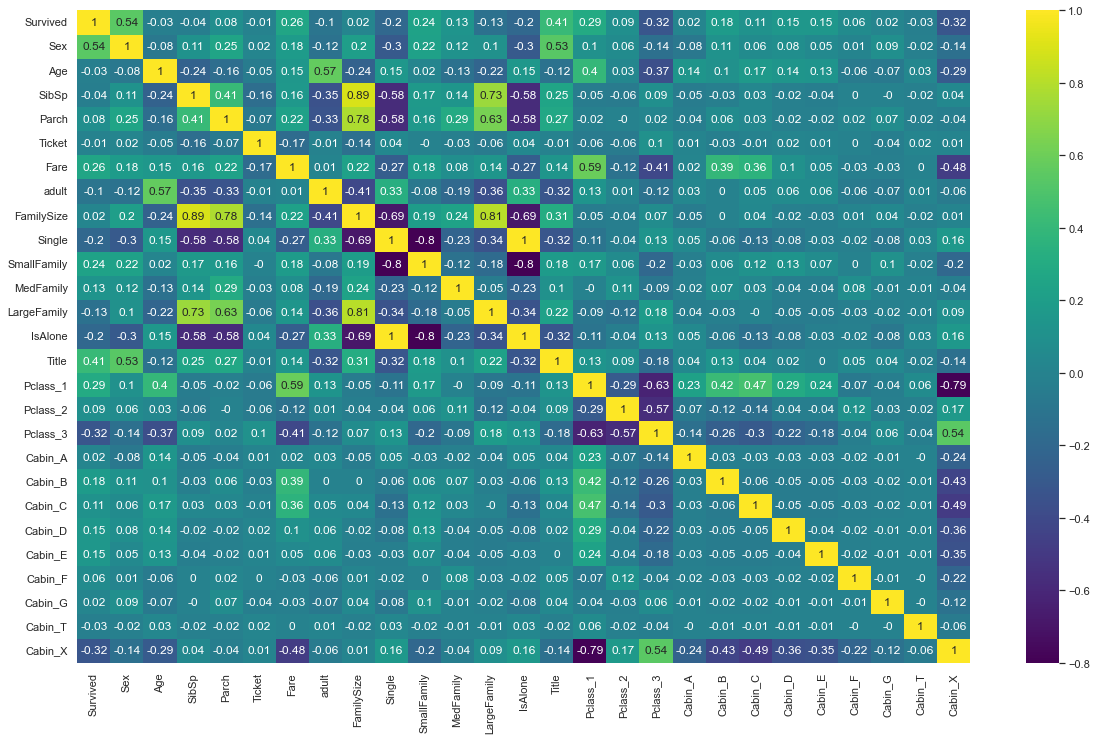

In [118]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr().round(2), cmap='viridis', annot=True)

### Embarked

In [119]:
df["Embarked"] = df["Embarked"].astype("category")
df = pd.get_dummies(df, columns=["Embarked"])

In [120]:
df.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,adult,AgeBin,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S
0,0,"Braund, Mr. Owen Harris",0,1.0,1,0,0,7.2500,1,"(16.336, 32.252]",...,0,0,0,0,0,0,1,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,1,71.2833,1,"(32.252, 48.168]",...,1,0,0,0,0,0,0,1,0,0
2,1,"Heikkinen, Miss. Laina",1,1.0,0,0,3,7.9250,1,"(16.336, 32.252]",...,0,0,0,0,0,0,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,3,53.1000,1,"(32.252, 48.168]",...,1,0,0,0,0,0,0,0,0,1
4,0,"Allen, Mr. William Henry",0,2.0,0,0,3,8.0500,1,"(32.252, 48.168]",...,0,0,0,0,0,0,1,0,0,1


# Preparar X y

In [128]:
X = df.drop(['Name', 'AgeBin', 'Single', 'TicketBin'], axis=1)
# exportar a csv para usar en otros notebooks
X.to_csv('../data/clean_titanic.csv', index=False)

In [121]:
X = df.drop(['Survived', 'Name', 'AgeBin', 'Single', 'TicketBin'], axis=1)
X.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,adult,FamilySize,SmallFamily,MedFamily,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S
0,0,1.0,1,0,0,7.2500,1,2,1,0,...,0,0,0,0,0,0,1,0,0,1
1,1,2.0,1,0,1,71.2833,1,2,1,0,...,1,0,0,0,0,0,0,1,0,0
2,1,1.0,0,0,3,7.9250,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,2.0,1,0,3,53.1000,1,2,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,2.0,0,0,3,8.0500,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [123]:
y = df.filter(["Survived"])
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Modelado final

Lo ideal sería ejecutar calc_predictions tras realizar cada uno de los preprocesados

In [124]:
calc_predictions(X, y)

C:\Users\alanj\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alanj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\alanj\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alanj\AppData\Local\Temp\ipykernel_30332\2726165645.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for examp

,model_name,accuracy,precision,recall_sensitivity,recall_specificity,f1,auc
0,LogisticRegression,0.789238,0.728261,0.752809,0.813433,0.740331,0.783121
1,KNeighborsClassifier,0.771300,0.715909,0.707865,0.813433,0.711864,0.760649
2,SVC,0.672646,0.735294,0.280899,0.932836,0.406504,0.606867
3,DecisionTreeClassifier,0.825112,0.771739,0.797753,0.843284,0.784530,0.820518
4,RandomForestClassifier,0.834081,0.788889,0.797753,0.858209,0.793296,0.827981
5,AdaBoostClassifier,0.816143,0.755319,0.797753,0.828358,0.775956,0.813056
6,GradientBoostingClassifier,0.816143,0.772727,0.764045,0.850746,0.768362,0.807396
